In [1]:
require('rstan')
require('tidyverse')
require('data.table')

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.17.3, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.1     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.3.0
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks rstan::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The foll

In [2]:
# read in all the M2 results
snps4 <-list.files("../../data/1015/m2/", pattern="snps4_*")


In [3]:
snps4_names <- str_replace_all(snps4, "\\.txt|snps4_", "")

In [4]:
snps4_in <- lapply(snps4, function(tab) fread(sprintf("../../data/1015/m2/%s", tab), sep=" ", header=TRUE, data.table=FALSE))

In [5]:
names(snps4_in) <- snps4_names

lapply(snps4_in, function(x) table(x$category))

$Creatinine_in_urine

2 4 
1 1 

$Glucose

 4 
78 

$Microalbumin_in_urine

4 
2 

$Phosphate

  2   3   4 
  1   1 188 

$Sodium_in_urine

4 
3 

$Testosterone

  2   3   4 
 73 264  13 

$Total_bilirubin

  4 
199 

$Triglycerides

  2   3   4 
  3   1 558 

$Urea

  4 
130 

$Vitamin_D

 4 
87 


In [21]:
snps4_in$"Testosterone" %>% filter(category==2)

SNP,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,p1,p2,p3,p4,category,gene
rs10518679,15,-0.0270330,-2.10015e-03,2.749188e-05,2.634964e-05,2.52950e-07,0.682444,7.135993e-02,0.9281187,1.812853e-05,0.0005032634,2,BMF
rs113253118,11,0.0681370,1.13176e-02,6.329921e-05,6.179595e-05,1.09950e-17,0.149951,3.836424e-12,0.9977027,3.815103e-15,0.0022973094,2,SLC22A9
rs113444667,11,0.0767834,6.21811e-03,6.181906e-05,6.216014e-05,1.60818e-22,0.430299,6.572675e-17,0.9988588,3.199071e-20,0.0011411858,2,SLC22A24
rs11575837,6,0.0580726,-2.13679e-02,1.638938e-04,1.602933e-04,5.73255e-06,0.0914644,3.996878e-01,0.5962129,9.088996e-04,0.0031904541,2,NCR3
rs117722415,7,-0.1164790,-8.94943e-03,1.197624e-04,1.141201e-04,1.91283e-26,0.402173,7.095351e-21,0.9981660,4.829815e-24,0.0018340060,2,NA
rs12400823,X,0.0203679,-2.89223e-03,1.831130e-05,8.896082e-06,1.93995e-06,0.332202,3.998088e-01,0.5998276,8.696300e-05,0.0002766045,2,NA
rs1265065,6,0.0689192,-2.61960e-02,2.341175e-04,2.312985e-04,6.66627e-06,0.0849902,3.979656e-01,0.5967422,1.124283e-03,0.0041678296,2,C6orf15
rs1265161,6,0.0807230,-1.79237e-02,2.241937e-04,2.209593e-04,7.00984e-08,0.227902,8.663878e-03,0.9880605,1.159772e-05,0.0032639773,2,POU5F1
rs12654812,5,0.0216722,1.45148e-03,1.563934e-05,1.537926e-05,4.25672e-08,0.711292,1.773152e-02,0.9818663,3.393525e-06,0.0003987542,2,RGS14
rs12925699,16,-0.0303757,-7.70694e-03,1.422640e-05,1.380702e-05,8.11472e-16,0.0380708,5.220905e-10,0.9968982,7.558976e-13,0.0031017564,2,CMIP


In [22]:
snps4_in$"Testosterone" %>% filter(category==3)

SNP,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,p1,p2,p3,p4,category,gene
Affx-13929749,17,-0.005129760,0.0197596,1.453653e-05,1.417748e-05,0.17848300,1.54118e-07,6.276538e-03,2.516039e-07,0.9936364,8.678555e-05,3,MAPT
Affx-14430109,17,-0.002769250,0.0263847,1.600640e-05,1.606775e-05,0.48882900,4.65126e-11,2.276706e-06,4.924040e-11,0.9999493,4.839783e-05,3,ALOX15B
Affx-3489493,10,-0.007251350,-0.0479641,4.169931e-05,4.082405e-05,0.26146700,6.09076e-14,2.450559e-09,1.262876e-13,0.9998669,1.331049e-04,3,NA
Affx-92039467,17,0.006009080,-0.0188145,1.578115e-05,1.574788e-05,0.13037000,2.12762e-06,6.980397e-02,3.701609e-06,0.9300852,1.071524e-04,3,"CRHR1,CRHR1"
Affx-92043071,17,-0.007060900,0.0172531,1.620167e-05,1.616675e-05,0.07939760,1.78023e-05,3.600756e-01,2.869761e-05,0.6397854,1.102619e-04,3,"MAPT,MAPT"
rs1007863,22,0.002881080,0.0249711,1.495787e-05,1.452913e-05,0.45631100,5.72809e-11,2.917209e-06,6.334901e-11,0.9999488,4.827881e-05,3,PARVB
rs1034948,X,0.001016190,0.0164173,3.041688e-05,1.486789e-05,0.85381400,2.06654e-05,4.028707e-01,9.612989e-06,0.5970890,3.071083e-05,3,NR0B1
rs1042725,12,0.001960070,-0.0193855,1.419134e-05,1.377464e-05,0.60285100,1.76093e-07,7.227047e-03,1.326294e-07,0.9927332,3.962694e-05,3,HMGA2
rs1049623,6,-0.011004100,-0.0230138,1.486673e-05,1.451625e-05,0.00431864,1.5418e-09,7.198539e-05,6.916279e-08,0.9978099,2.118042e-03,3,DDR1
rs1052618,3,0.004324650,-0.0207629,1.638347e-05,1.596346e-05,0.28532700,2.03181e-07,7.744461e-03,2.359449e-07,0.9921892,6.610117e-05,3,SLC35G2


In [7]:
require('data.table')
testosterone <- fread("../../data/1015/m2/snp_table_Testosterone.txt", sep=" ", header=TRUE, data.table=FALSE)

In [23]:
table(testosterone$category)


     1      2      3      4 
184894     73    264     13 

In [27]:
filter(snps4_in$"Phosphate", category !=4)

SNP,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,p1,p2,p3,p4,category,gene
Affx-80210956,1,1.13480,1.340540,0.02941019,0.03571117,3.67405e-11,1.31152e-12,1.205814e-05,0.0421032,9.551998e-01,0.0026849368,3,ALPL
rs121918002,1,1.07701,0.901671,0.01639808,0.02325808,4.11610e-17,3.38081e-09,5.233314e-10,0.9997188,1.776446e-08,0.0002812284,2,ALPL


In [28]:
filter(snps4_in$"Creatinine_in_urine", category !=4)

SNP,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,p1,p2,p3,p4,category,gene
rs62029217,15,-0.0210053,-0.0109351,1.215429e-05,1.401574e-05,1.6935e-09,0.00349076,0.3604251,0.4272558,2.380994e-07,0.2123189,2,SCAMP5


In [29]:
filter(snps4_in$"Triglycerides", category !=4)

SNP,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,p1,p2,p3,p4,category,gene
rs118204057,8,0.738675,0.696083,0.006215635,0.006715458,7.38102e-21,2.01089e-17,4.930663e-14,8.694530e-01,7.459090e-05,1.304724e-01,2,LPL
rs145464906,19,-0.629925,-0.488635,0.006454001,0.007251510,4.49369e-15,9.59174e-09,2.590731e-08,9.696502e-01,1.253881e-07,3.034969e-02,2,C19orf80
rs150090666,11,-0.592027,-0.314152,0.002721730,0.003131622,7.77979e-30,1.98317e-08,9.783757e-23,9.978070e-01,1.549026e-22,2.193046e-03,2,PDE3B
rs201079485,11,0.905987,1.113290,0.010002000,0.010987652,1.33017e-19,2.43798e-26,8.041482e-19,9.047176e-07,9.999990e-01,6.659478e-08,3,APOA5


In [30]:
### check convergencence


Inference for Stan model: model2.
4 chains, each with iter=600; warmup=200; thin=1; 
post-warmup draws per chain=400, total post-warmup draws=1600.

              mean se_mean      sd    2.5%     50%   97.5% n_eff    Rhat
sigmasq[1] 0.02472 0.00010 0.00400 0.01839 0.02431 0.03362  1600 0.99936
sigmasq[2] 0.00554 0.00001 0.00049 0.00469 0.00551 0.00664  1600 0.99964
sigmasq[3] 0.16332 0.00184 0.07354 0.07586 0.14663 0.35242  1600 0.99915
sigmasq[4] 0.24807 0.00284 0.11362 0.11414 0.21938 0.54122  1600 0.99883
pi[1]      0.99587 0.00001 0.00028 0.99529 0.99588 0.99642  1554 0.99944
pi[2]      0.00067 0.00000 0.00009 0.00051 0.00066 0.00085  1600 0.99899
pi[3]      0.00338 0.00001 0.00026 0.00288 0.00337 0.00391  1496 1.00020
pi[4]      0.00008 0.00000 0.00003 0.00004 0.00008 0.00014  1600 0.99944

Samples were drawn using NUTS(diag_e) at Wed Oct 16 01:40:08 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on spl

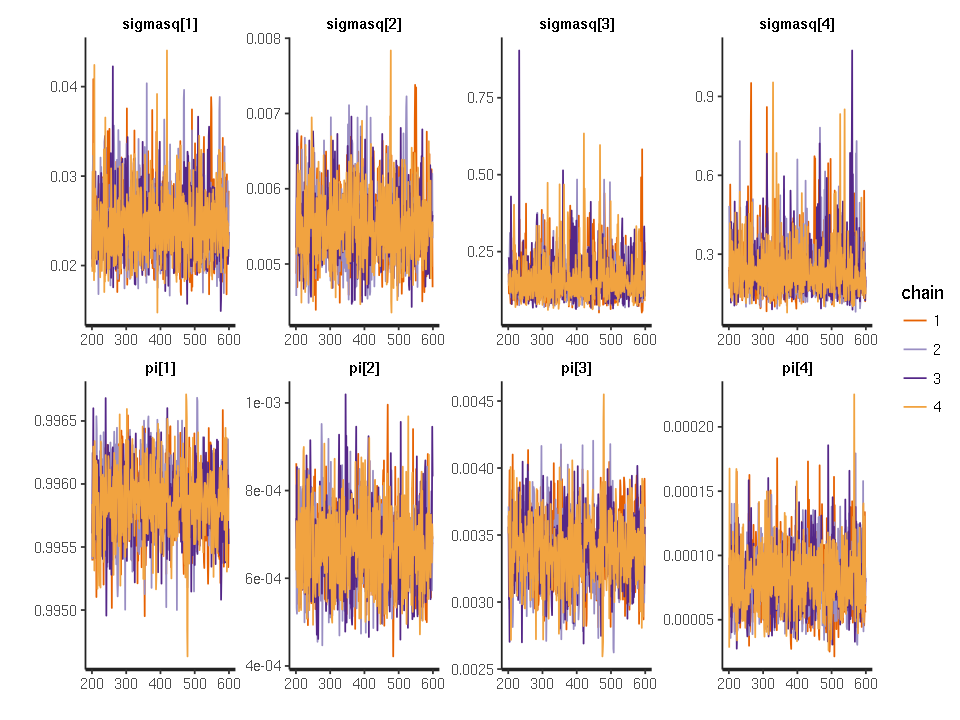

In [33]:
load("../../data/1015/m2/f_m2_Testosterone.RData")
print(fit2, pars=c("sigmasq", "pi"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(fit2, pars = c("sigmasq", "pi"), inc_warmup = FALSE, nrow = 2)

Inference for Stan model: model2.
4 chains, each with iter=600; warmup=200; thin=1; 
post-warmup draws per chain=400, total post-warmup draws=1600.

              mean se_mean       sd    2.5%     50%    97.5% n_eff    Rhat
sigmasq[1] 4.16768 0.70763 21.34436 0.22063 1.04869 19.42739   910 0.99960
sigmasq[2] 5.56555 0.70021 20.40611 0.26491 1.37807 34.45383   849 1.00140
sigmasq[3] 1.68531 0.20731  5.50656 0.19559 0.72819  8.16447   706 1.00170
sigmasq[4] 1.51390 0.13201  3.33506 0.18941 0.72002  7.74077   638 1.00745
pi[1]      0.99997 0.00000  0.00001 0.99994 0.99997  0.99999  1085 1.00769
pi[2]      0.00001 0.00000  0.00001 0.00000 0.00001  0.00003  1207 0.99998
pi[3]      0.00001 0.00000  0.00001 0.00000 0.00000  0.00002  1600 1.00504
pi[4]      0.00001 0.00000  0.00001 0.00000 0.00001  0.00004  1221 1.00297

Samples were drawn using NUTS(diag_e) at Wed Oct 16 04:07:48 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduc

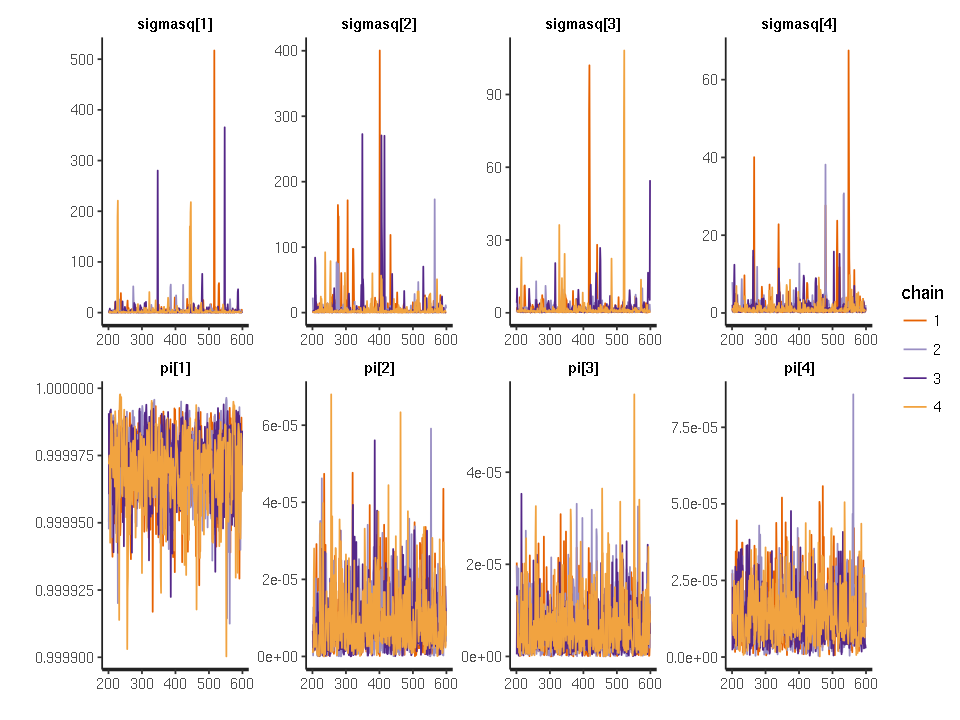

In [37]:
load("../../data/1015/m2/f_m2_Creatinine_in_urine.RData")
print(fit2, pars=c("sigmasq", "pi"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(fit2, pars = c("sigmasq", "pi"), inc_warmup = FALSE, nrow = 2)